In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline 

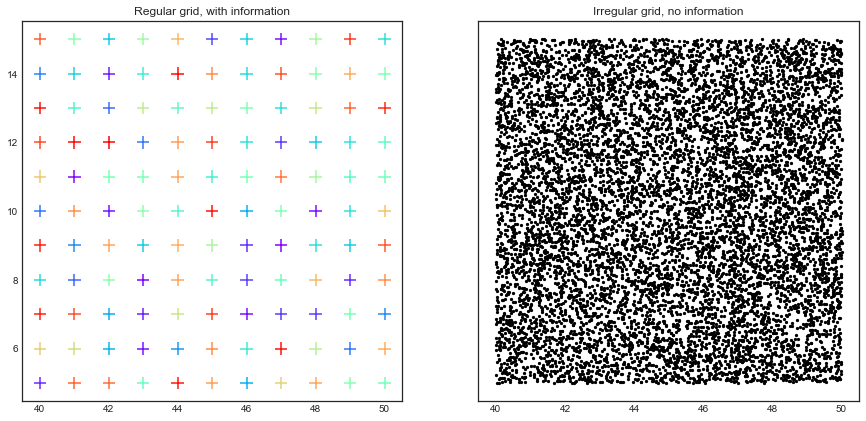

In [2]:
"""
Create a regular grid, define random value for each grid point
"""
lat = np.linspace(40, 50, 11)
lon = np.linspace(5, 15, 11)
glat, glon = np.meshgrid(lat,lon)
glat_1d, glon_1d = glat.flatten(), glon.flatten()
XY = np.array([(glat_1d[x],glon_1d[x]) for x in range(len(glat_1d))])
value = np.random.randint(100, size=11*11)


"""
Create a irregular grid, no value defined at grid points
"""
n = 10000
lat_ir = np.random.rand(n)*10+40
lon_ir = np.random.rand(n)*10+5
XY_ir = np.array([(lat_ir[elem],lon_ir[elem]) for elem in range(len(lat_ir))])


"""
Draw regular and irregular grids
"""
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
ax1.set_title('Regular grid, with information')
ax1.scatter(glat_1d, glon_1d, s=155, c=value, marker='+', cmap='rainbow')
ax2.set_title('Irregular grid, no information')
ax2.scatter(XY_ir[:,0], XY_ir[:,1], c='k', s=5, marker='o');

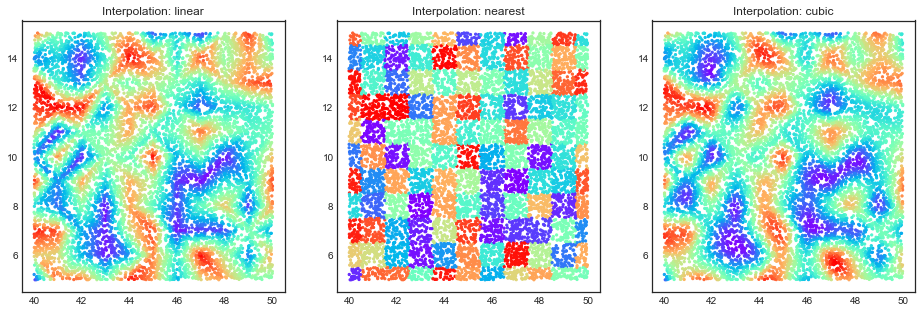

In [3]:
"""
Interpolate values from regular grid to irregular grid and draw results
"""
fig = plt.figure(figsize=(16, 5))
for i, method in enumerate(['linear', 'nearest', 'cubic']):
    
    # Do interpolation between grids
    grid_res = griddata(XY,
                        value, 
                        XY_ir, 
                        method=method)
    
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_title('Interpolation: {}'.format(method))
    plt.scatter(XY_ir[:,0], XY_ir[:,1], c=grid_res, s=5, marker='o', cmap='rainbow')